# <center> Python for Data Science - Final Project:
## <center> A Data Science Approach to Predict Forest Fires
<center>
By:
- Johannes RUSCHER
- Javier FERNANDEZ
</center>

## Data overview

The first step in doing any data analysis is to import the required libraries that will help us read, visualize, and analyze the data through python functions.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# +Config to plot inline: %matplotlib inline 

We can now open the CSV data file and take a look at our initial dataset.

In [46]:
forest_fires_data_filepath = 'data/forestfires.csv'
df = pd.read_csv(forest_fires_data_filepath) # data_forest dataframe
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Let us now use some basic data inspection functions on the dataset.

In [47]:
# Get general information about the forest fires data
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [48]:
# Get general information about the dataset itself
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


We can see that the data consists of 13 columns in total, from which 12 are input variables or features and one is the output variable. The dataset contains 517 rows of information, and from the `.info()` method we can already see that all the 13 columns already contain 517 non-null values, so we can conclude that there are __no missing values__ to handle. We can also see that there are only 2 categorical features, month and day (time data).

### Understanding the data

As specified in the data description and study document, the data consists of:

2 spatial features, 

> - **X** - x-axis spatial coordinate within the Montesinho park map: 1 to 9
> - **Y** - y-axis spatial coordinate within the Montesinho park map: 2 to 9

2 temporal features, 

> - **month** - month of the year: "jan" to "dec" 
> - **day** - day of the week: "mon" to "sun"

4 FWI __*__ components, 

> - **FFMC** - FFMC index from the FWI system: 18.7 to 96.20
> - **DMC** - DMC index from the FWI system: 1.1 to 291.3 
> - **DC** - DC index from the FWI system: 7.9 to 860.6 
> - **ISI** - ISI index from the FWI system: 0.0 to 56.10

4 weather related features, 

> - **temp** - temperature in Celsius degrees: 2.2 to 33.30
> - **RH** - relative humidity in %: 15.0 to 100
> - **wind** - wind speed in km/h: 0.40 to 9.40 
> - **rain** - outside rain in mm/m2 : 0.0 to 6.4 

and the area burned value, which corresponds to the **output** variable.

> - **area** - the burned area of the forest (in ha): 0.00 to 1090.84 
(this output variable is very skewed towards 0.0, thus it may make

__*__ The forest **[Fire Weather Index (FWI) System](https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system)** is a way to calculate a unit-less number that will describe the intensity of a fire based solely on weather condition readings. 

> There are 3 *fuel moisture* categories or codes, which can be converted to moisture content:
> 
> - **Fine Fuel Moisture Code (FFMC)** represents moisture conditions for shaded litter fuels. Subtracting the FFMC value from 100 can provide an estimate for the equivalent fuel moisture content (ranges from 0 to 101).
> - **Duff Moisture Code (DMC)** represents fuel moisture of decomposed organic material underneath the litter. It may provide insidght to live fuel moisture stess (open ended).
> - **Drought Code (DC)** represents drying deep into the soil. Extreme drought conditions have produced DC values near 800 (ranges from 0 to 1000).
> 
> Fuel moisture codes rise as fuels dry out, and falls with precipitation and (primarily with FFMC) with moderating weather.
> 
> There are 3 *fire behavior indices* in the FWI System:
> 
> - The **Initial Spread Index (ISI)** integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential (open ended).
> - The **Buildmap Index (BUI)** combines the current DMC and DC to produce an estimate of potential heat release in heavier fuels (open ended).
> - The **Fire Weather Index (FWI)** integrates current ISI and BUI to produce a unitless and open ended index of general fire intensity potential. With dry fuel conditions, it is a key indicator of extreme fire behavior potential.
> 
> ![FWI Chart](res/fwi-chart.png "fwi-chart")

### Limitations of the data

The temporal data consists only of the month and the day on which the fire was recorded but it does not contain the exact date. Since the data was recorded over the span of three years it would be interesting to see if the occurence fluctuated between years. Secondly, we don't know how long a fire lasted. Finally, looking at accumulated parameters, especially rain, and the impact on occurences of fire would be very interesting.

## *A.* Statistical analysis and feature engineering

Our objective here will be to understand how the variables interact with each other in order to know or to have a better idea of how to build a proper model that will actually be meaningful and provide useful information.

First let us take a look at the **area** feature, our output variable.

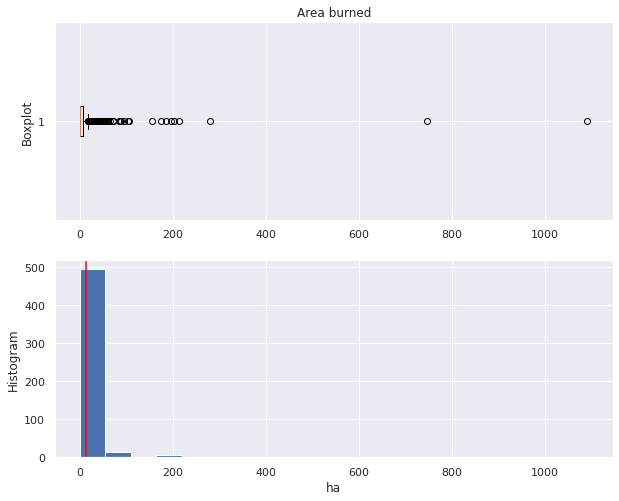

In [49]:
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title('Area burned')

plt.ylabel('Boxplot')
plt.boxplot(df['area'], vert=False)

plt.subplot(2, 1, 2)
plt.ylabel('Histogram')
plt.hist(df['area'], bins=20)
plt.axvline( df['area'].mean(), color='red' ) # add the mean value
plt.xlabel('ha')

plt.show()

We can confirm that the data is extremely skewed towards 0, so let us use instead its logarithmic transform using *y=ln(x+1)* to fix it. We can conclude however that the vast majority of the fires, at least recorded in this dataset, are *relatively* small (<100ha), because even from the information given previously by the `.describe()` method shows that 75% of the fires are <= 6.57 ha, which is (barely) visible in the boxplot.

In [50]:
import math
df['area_ln'] = df['area'].map(lambda x: math.log(x+1))

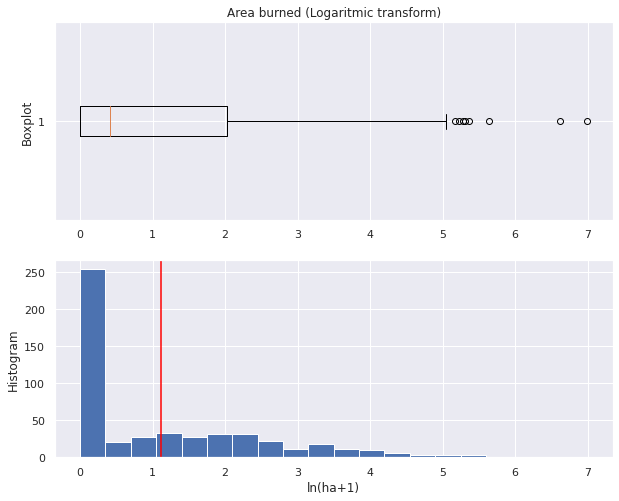

In [51]:
# And plot again
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title('Area burned (Logaritmic transform)')

plt.ylabel('Boxplot')
plt.boxplot(df['area_ln'], vert=False)

plt.subplot(2, 1, 2)
plt.ylabel('Histogram')
plt.hist(df['area_ln'], bins=20)
plt.axvline( df['area_ln'].mean(), color='red' ) # add the mean value
plt.xlabel('ln(ha+1)')

plt.show()

We can now take a look at the other features. Let us start with the temporal variables for example, `month` and `day`. We could see if there is a remarkable relation between these variables and the amount of fires.

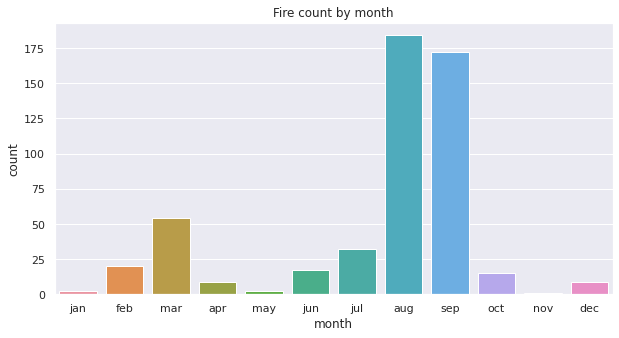

In [52]:
def count_monthly_occurances():
    sns.countplot(x="month", data=df, order=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]).set(title='Fire count by month')
count_monthly_occurances()

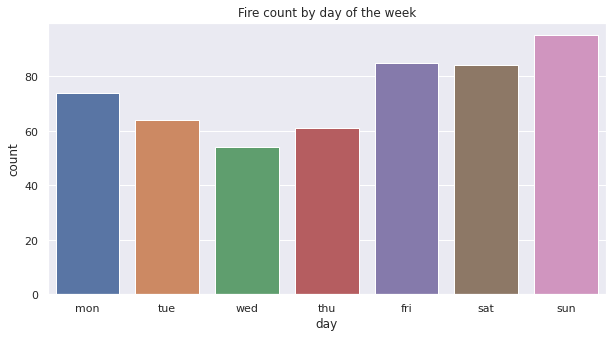

In [53]:
def count_daily_occurances():
    sns.countplot(x="day", data=df, order = ["mon","tue","wed","thu","fri","sat","sun"]).set(title='Fire count by day of the week')
count_daily_occurances()

We observe that actually there is a visible correlation between the day of the week and the month of the year with the quantity of fires recorded. Although the high fire count during the months of august and september can be related to the weather conditions, the fact that a lot of fires happen during the weekend may imply the fact that most of these fires are actually caused by human activity. In any case, it will be a good practice to encode these **ordinal** features so we do not have to  sort them manually in the future.

In [64]:
# Cast *month* and *day* as categorical data
df["month"] = df["month"].astype('category')
df["day"] = df["day"].astype('category')

# Now we can encode them in order (starting with 1)
month_ordering = ["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]
df["month_n"] = df["month"].apply(lambda m: month_ordering.index(m)+1)

day_ordering = ["mon","tue","wed","thu","fri","sat","sun"]
df["day_n"] = df["day"].apply(lambda d: day_ordering.index(d)+1)

# See result
df[['month', 'month_n', 'day', 'day_n']].head()

,month,month_n,day,day_n
0,mar,3,fri,5
1,oct,10,tue,2
2,oct,10,sat,6
3,mar,3,fri,5
4,mar,3,sun,7


---

Let us see if there are regions more prone to fire than others.

In [ ]:
# I would like to see this information as a heatmap, so actually I will build a separate custom dataframe for this
fires_by_area = df[['X', 'Y', 'area']]
print(fires_by_area.describe())
# sns.heatmap( df[['X', 'Y']] )

Since we have many values for the area burned (continuous data), we think it would also be interesting, to simplify the problem and to maybe give not so accurate but perhaps much more relevant information, to categorize the size of the fires in small, medium or big. For this we will apply another lambda function to create a new feature *area_cat*.

# Todo

## Data preparation
- [ ] Quality of data
- [ ] Limitations of data

## A) Statistical analysis and feature engineering
- [ ] Unidimensional
- [ ] Multidimensional 
    - [ ] Subtask
- [ ] Recoding of variables, transformation
    - [x] Encode ordinal variables (month, day)
    - [ ] classify fires as small, medium and big.

## B) Unsupervised Learning: Clustering
- [ ] Clustering techniques, distribution of fires according to different factors
- [ ] Bonus: Several factors at the same time

## C) Supervised Learning: Regression
- [ ] Target variable? Variable to predict? Discussion! Target is numerical here!
- [ ] Construct model to predict burned area. Try several models. Lin Reg, Reg, Decision trees
- [ ] Bonus: Can you predict other variables?

## D) Supervised Learning: Classification
- [ ] New nonnumerical variable calculated from existing ones. Binary, categorical. Should not be a ration scale and should represent data labels!
- [ ] Classification.
- [ ] Evaluate model: Accuracy, precision, ...
- [ ] Bonus: Try new models not seen in the course. Random forest technique, ... (free to chose)